In [31]:
# import relevant libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
# import dataset
file = 'airbnb.xlsx'

# assign dataset to a variable
pd.set_option('display.max_columns', 100)
df = pd.read_excel(file)

# view first 20 rows of the dataset
df.head(20)

,Host Id,Host Since,Name,Borough,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,2008-08-12,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,2008-08-20,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0
9,2339,2008-08-20,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0


#### sampling out test set from the data set to reduce risk of data leakage

In [3]:
# import relevant library
from sklearn.model_selection import train_test_split

# set random seed
seed = 234

# split out the test and train sets from the data
Train, Test = train_test_split(df, test_size=.33, random_state=seed)

In [49]:
# save Test set to local machine
Test.to_csv('airbnbTest.csv')

In [50]:
# save Train set to local machine
Train.to_csv('airbnbTrain.csv')

### EDA the original dataset - df

In [105]:
# analyse the percentage missing values of each variable from the original datasets
df.isnull().mean()

Host Id                       0.000000
Host Since                    0.000098
Name                          0.000000
Borough                       0.000000
Property Type                 0.000098
Review Scores Rating (bin)    0.273082
Room Type                     0.000000
Zipcode                       0.004397
Beds                          0.002789
Number of Records             0.000000
Number Of Reviews             0.000000
Price                         0.000000
Review Scores Rating          0.273082
dtype: float64

In [106]:
len(df)

30478

In [107]:
# Analyse descriptive stats of numerical variables
df.describe()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,163.589737,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,197.785454,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,10.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,80.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,125.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,195.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,10000.000000,100.000000


#### visualise distribution of each numerical variable using histogram

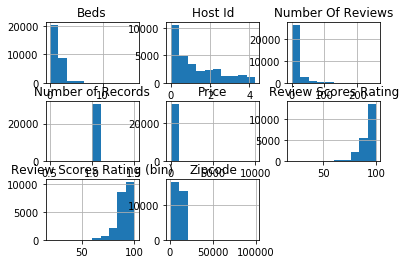

In [54]:
df.hist()
plt.show()

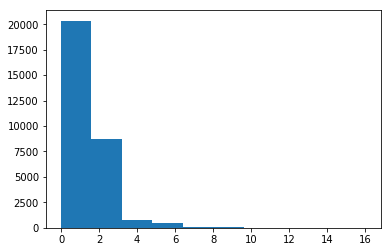

In [58]:
# the distribution of beds. Plotted with plt so as not to tamper with the missing values yet
plt.hist(df['Beds'])
plt.show()

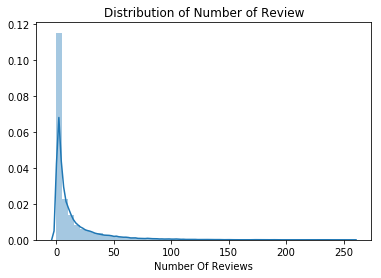

In [59]:
# the distribution of Number Of Reviews
sns.distplot(df['Number Of Reviews'], kde=True).set_title('Distribution of Number of Review')
plt.show()

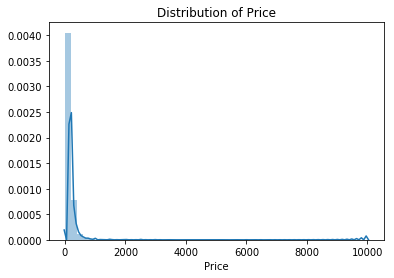

In [60]:
# the distribution of Price
#plt.hist(df['Price'])
sns.distplot(df['Price'], kde=True).set_title('Distribution of Price')
plt.show()

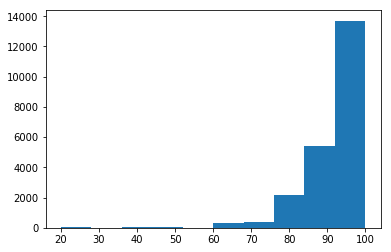

In [61]:
# the distribution of Review Scores Rating
plt.hist(df['Review Scores Rating'])
plt.show()

##### Let's Use Boxplot

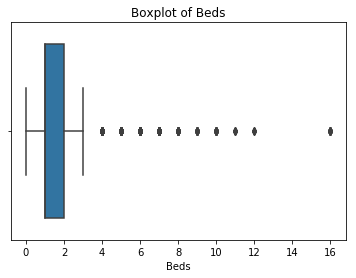

In [38]:
# the distribution of Price
sns.boxplot(df['Beds']).set_title('Boxplot of Beds')
plt.show()

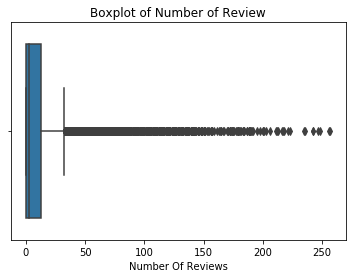

In [63]:
# the distribution of Number Of Reviews
sns.boxplot(df['Number Of Reviews']).set_title('Boxplot of Number of Review')
plt.show()

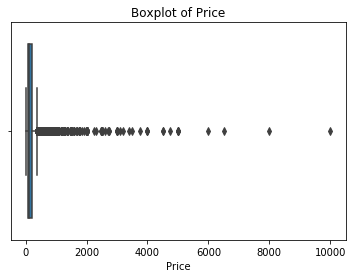

In [64]:
# the distribution of Price
sns.boxplot(df['Price']).set_title('Boxplot of Price')
plt.show()

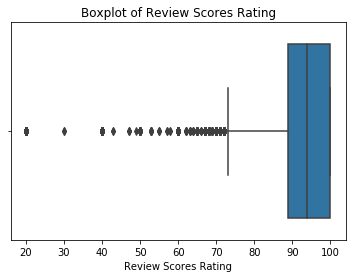

In [65]:
# the distribution of Review Scores Rating
sns.boxplot(df['Review Scores Rating']).set_title('Boxplot of Review Scores Rating')
plt.show()

#### Faceting Price with some categorical variables.

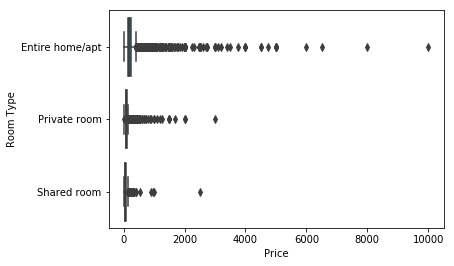

In [66]:
# Faceting Price and Room Type
sns.boxplot(df['Price'], df['Room Type'])
plt.show()

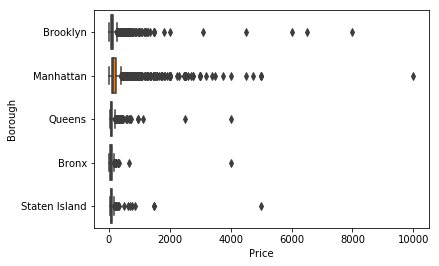

In [68]:
# Faceting Price and Neighbourhood (for some reason, yet unknown, Seaborn is unable to plot this graph)
sns.boxplot(df['Price'], df['Borough'])
plt.show()

#### Analyse association of numerical variables to Price

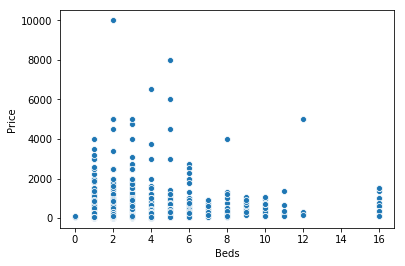

In [69]:
# Association between Beds and Price
sns.scatterplot('Beds', 'Price', data=df)
plt.show()

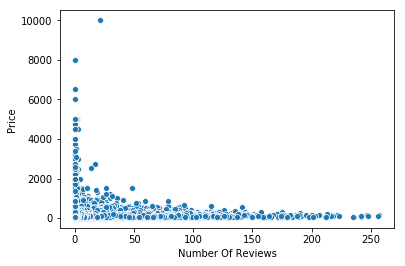

In [70]:
# Association between Number Of Reviews and Price
sns.scatterplot('Number Of Reviews', 'Price', data=df)
plt.show()

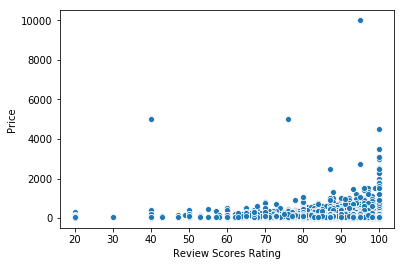

In [71]:
# Association between Review Scores Rating and Price
sns.scatterplot('Review Scores Rating', 'Price', data=df)
plt.show()

In [72]:
df.corr(method='pearson')

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
Host Id,1.000000,-0.027060,-0.010191,-0.003232,NaN,-0.273226,-0.041046,-0.053590
Review Scores Rating (bin),-0.027060,1.000000,0.023669,-0.075283,NaN,-0.062684,0.059740,0.987201
Zipcode,-0.010191,0.023669,1.000000,0.015414,NaN,-0.018328,-0.118857,0.022110
Beds,-0.003232,-0.075283,0.015414,1.000000,NaN,0.045795,0.316313,-0.070923
Number of Records,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number Of Reviews,-0.273226,-0.062684,-0.018328,0.045795,NaN,1.000000,-0.040600,-0.015185
Price,-0.041046,0.059740,-0.118857,0.316313,NaN,-0.040600,1.000000,0.060703
Review Scores Rating,-0.053590,0.987201,0.022110,-0.070923,NaN,-0.015185,0.060703,1.000000


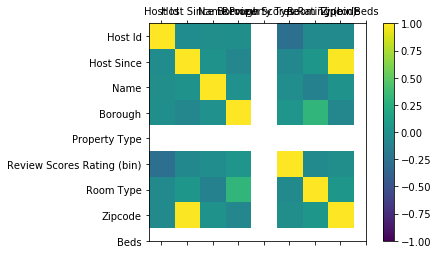

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [24]:
# Checking correlation between predictors and the target (train set)
trainCorr = Train.corr()
trainCorr.Price.sort_values(ascending=False)

Price                   1.000000
Beds                    0.310478
Borough                 0.046702
Review Scores Rating    0.044302
Age                     0.022829
Property Type           0.001485
Number Of Reviews      -0.036072
Room Type              -0.068383
Name: Price, dtype: float64

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """


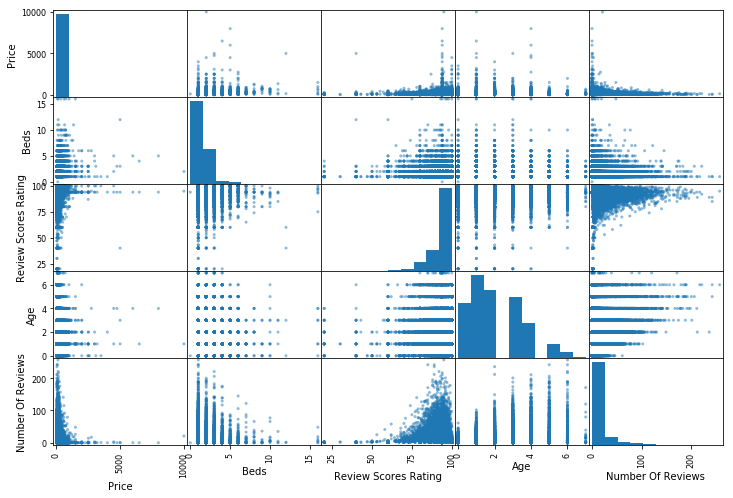

In [26]:
# scatter matrix on the train set
from pandas import scatter_matrix

attributes = ['Price', 'Beds', 'Review Scores Rating', 'Age', 'Number Of Reviews']

scatter_matrix(Train[attributes], figsize=(12,8))
plt.show()

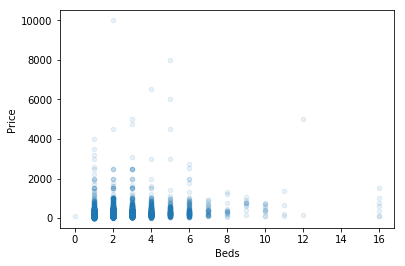

In [29]:
# look deeper into Beds (train set)
Train.plot(kind='scatter', x='Beds', y='Price', alpha=.1)
plt.show()

### Data Preparation - performed only on the Train set

In [5]:
# Property Type
# House, Condominium, Townhouse, Villa, Bungalow, Chalet, Castle will be converted to House.
# Dorm, Camper/RV, Treehouse, Tent, Hut and Lighthouse will be converted to Mini_house.
# Apartment, Bed & Breakfast, Other, Loft will be converted to Apartment.
# Boat, Cabin will be converted to Conveyance
Train['Property Type'].unique().tolist()

['Apartment',
 'Loft',
 'House',
 'Condominium',
 'Townhouse',
 'Bed & Breakfast',
 'Tent',
 'Other',
 'Dorm',
 'Treehouse',
 'Camper/RV',
 'Boat',
 'Chalet',
 'Villa',
 'Bungalow',
 'Cabin',
 'Hut',
 nan]

In [6]:
# Room Type
# all Entire home/apt will be converted to Private room
Train['Room Type'].unique().tolist()

['Entire home/apt', 'Private room', 'Shared room']

In [7]:
# I will like to make prediction with the review scores rating being in continuous form so as to see the effect of 1 change in 
# reviews scores rating on price
Train['Review Scores Rating'].unique().tolist()

[87.0,
 85.0,
 90.0,
 nan,
 100.0,
 93.0,
 80.0,
 95.0,
 91.0,
 86.0,
 96.0,
 94.0,
 98.0,
 89.0,
 40.0,
 82.0,
 88.0,
 76.0,
 97.0,
 77.0,
 84.0,
 92.0,
 70.0,
 81.0,
 72.0,
 99.0,
 65.0,
 83.0,
 73.0,
 74.0,
 79.0,
 60.0,
 75.0,
 53.0,
 30.0,
 67.0,
 78.0,
 71.0,
 69.0,
 20.0,
 50.0,
 68.0,
 43.0,
 58.0,
 64.0,
 62.0,
 57.0,
 66.0,
 47.0,
 55.0,
 49.0]

In [8]:
# Use the year values of 'Host Since' and convert it to age of Host to see if there's an effect in the number of years an
# host has been on airbnb in determining price of a home.
# Assumes it's year 2015 and so the oldest host will have an age of 8 and so on

In [9]:
Train.head(1)

,Host Id,Host Since,Name,Borough,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
14983,8235445,2013-08-18,Downtown Brooklyn Living,Brooklyn,Apartment,85.0,Entire home/apt,11201.0,4.0,1,28,163,87.0


In [10]:
# remove irrelevant features
Train.drop(['Host Id', 'Name', 'Review Scores Rating (bin)', 'Zipcode', 'Number of Records'], axis=1, inplace=True)
Train.head(4)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating
14983,2013-08-18,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0
14303,2013-07-13,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0
5560,2012-02-02,Manhattan,Apartment,Private room,1.0,4,90,90.0
6603,2012-04-23,Brooklyn,Apartment,Entire home/apt,1.0,0,110,NaN


##### Convert Host Since to Years and then age of Host on Airbnb

In [11]:
# Convert Host Since to Years (named it Age already)
Train['Age'] = Train['Host Since'].map(lambda x: x.year)
Train.head()

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
14983,2013-08-18,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0,2013.0
14303,2013-07-13,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0,2013.0
5560,2012-02-02,Manhattan,Apartment,Private room,1.0,4,90,90.0,2012.0
6603,2012-04-23,Brooklyn,Apartment,Entire home/apt,1.0,0,110,NaN,2012.0
30233,2015-08-19,Brooklyn,Apartment,Private room,1.0,3,70,100.0,2015.0


In [12]:
# fill up Age attribute NAs with the mode value 2015 to allow for easier calculation later
Train.Age.fillna(Train.Age.mode()[0], inplace=True)
Train.head()

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
14983,2013-08-18,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0,2013.0
14303,2013-07-13,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0,2013.0
5560,2012-02-02,Manhattan,Apartment,Private room,1.0,4,90,90.0,2012.0
6603,2012-04-23,Brooklyn,Apartment,Entire home/apt,1.0,0,110,NaN,2012.0
30233,2015-08-19,Brooklyn,Apartment,Private room,1.0,3,70,100.0,2015.0


In [13]:
# convert values in Age attribute to integer
Train.Age = Train.Age.fillna(0.0).astype(int)
Train.head(3)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
14983,2013-08-18,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0,2013
14303,2013-07-13,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0,2013
5560,2012-02-02,Manhattan,Apartment,Private room,1.0,4,90,90.0,2012


In [14]:
# convert the years to age in number of years
Train.Age = 2015 - Train.Age
Train.head(3)

,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
14983,2013-08-18,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0,2
14303,2013-07-13,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0,2
5560,2012-02-02,Manhattan,Apartment,Private room,1.0,4,90,90.0,3


In [15]:
# drop the 'Host Since' variable
Train.drop('Host Since', axis=1, inplace=True)
Train.head(2)

,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
14983,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0,2
14303,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0,2


In [16]:
Train.isnull().sum()

Borough                    0
Property Type              2
Room Type                  0
Beds                      55
Number Of Reviews          0
Price                      0
Review Scores Rating    5603
Age                        0
dtype: int64

##### Merging values of some attributes to one. This will reduce noise and also for easy modelling.

In [17]:
# For Property Type
# House, Condominium, Townhouse, Villa, Bungalow, Chalet, Castle will be converted to House (They are all similar to being just a house). 
# Dorm, Camper/RV, Treehouse, Tent, Hut and Lighthouse will be converted to Mini_house.
# Apartment, Bed & Breakfast, Other, Loft will be converted to Apartment.
# Boat, Cabin will be converted to Conveyance
#df['Propety_Type'] = 
Train['Property Type'].replace({'Condominium' : 'House', 'Townhouse' : 'House', 'Villa' : 'House', 'Bungalow' : 'House', 'Chalet' : 'House', 'Castle' : 'House',
                                               'Dorm' : 'Mini_house', 'Camper/RV' : 'Mini_house', 'Treehouse' : 'Mini_house', 'Tent' : 'Mini_house', 'Hut' : 'Mini_house', 'Lighthouse' : 'Mini_house',
                                               'Bed' : 'Apartment', 'Bed &Breakfast' : 'Apartment', 'Other' : 'Apartment', 'Loft': 'Apartment',
                                               'Boat' : 'Conveyance', 'Cabin' : 'Conveyance'}, inplace=True)
Train.head(2)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
14983,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0,2
14303,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0,2


In [18]:
# There was a mistake in the first code in converting 'Bed & Breakfast' to 'Apartment'
Train['Property Type'].replace({'Bed & Breakfast' : 'Apartment'}, inplace=True)
Train['Property Type'].unique().tolist()

['Apartment', 'House', 'Mini_house', 'Conveyance', nan]

In [19]:
# For Room Type
# all Entire home/apt will be converted to Private room
Train['Room Type'].replace({'Entire home/apt' : 'Private room'}, inplace=True)
Train['Room Type'].unique().tolist()

['Private room', 'Shared room']

##### Impute Missing Values

In [20]:
# Label encode all categorical variables to prepare for estimating missing values
Train['Borough'].replace({'Brooklyn' : 1, 'Manhattan' : 2, 'Queens' : 3, 'Bronx' : 4, 'Staten Island' : 5}, inplace=True)
Train['Room Type'].replace({'Private room' : 1, 'Shared room' : 2}, inplace=True)
Train['Property Type'].replace({'Apartment' : 1, 'House' : 2, 'Mini_house' : 3, 'Conveyance' : 4}, inplace=True)
Train.head()

,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
14983,1,1.0,1,4.0,28,163,87.0,2
14303,2,1.0,1,3.0,32,206,85.0,2
5560,2,1.0,1,1.0,4,90,90.0,3
6603,1,1.0,1,1.0,0,110,NaN,3
30233,1,1.0,1,1.0,3,70,100.0,0


In [21]:
# Fill up missing values with mode and median.
# Mode for Property Type as it is a categorical variable
# Mode for Beds (it's the same value as the median)
# Median for Review Scores Rating. Due to the high amount of outliers, median is better for central tendency.
Train['Property Type'].fillna(Train['Property Type'].mode()[0], inplace=True)
Train['Beds'].fillna(Train['Beds'].mode()[0], inplace=True)
Train['Review Scores Rating'].fillna(Train['Review Scores Rating'].median(), inplace=True)

##### Identifying and removing outliers

```python
# handling outliers with IQR method

trainA = Train.values

# generate Q2 and Q3 from the train data
q2, q3 = np.percentile(trainA, 25), np.percentile(trainA, 75)

# generate interquartile range
iqr = q3 - q2

# calculate outliers from it
cutOff = iqr * 3 # k=3 used so as to be cautious against cutting off most part of the data. This will idetify extreme outliers

# create lower and upper broundaries for cutting off outliers
lb, ub = q2 - cutOff, q3 - cutOff

# identify outliers
outliers = [x for x in trainA if x < lb or x > ub]
print('Outliers: %d' % len(outliers))
```

In [51]:
# converting Train set to arrays
trainA = Train.values

# import relevant library
from sklearn.neighbors import LocalOutlierFactor

# instantiate function
lof = LocalOutlierFactor()
ohat = lof.fit_predict(trainA)

# select non outliers
mask = ohat != -1
trainA = trainA[mask, :]

print(trainA.shape)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


(18378, 8)


### CREATE PIPELINE FOR DIFFERENT TRANSFORMATONS ON TRAIN DATASET

In [79]:
# create a class that has 3 functions (drop features, replace 1, replace 2 and convert host to age.)

# import relevant libraries
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room: # if add_bedrooms_per_room == true, then...
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [92]:
# assign column index
host_in, hostsince_in, name_in, borough_in, property_in, reviewbin_in, room_in, zip_in, beds_in, records_in, review_in, price_in, rating_in = range(0, 13, 1)

class TidyData(BaseEstimator, TransformerMixin):
    def __init__(self, age_missing_values = True): # for hyperparameter if age has missing values
        self.age_missing_values = age_missing_values
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        import pandas
        import numpy
        # to derive age variable from host since variable
        Age = X.iloc[:, hostsince_in].map(lambda x: x.year) # create the variable
        if self.age_missing_values:
            Age.fillna(Age.mode()[0], inplace=True) # fill missing values, if any, with the mode value
        Age.fillna(0.0).astype(int) # convert values to integers
        2015 - Age # convert year to number of years (age)
        # to reduce unique values of Property Type and Room Type variables
        X.iloc[:, property_in].replace({'Condominium' : 'House', 'Townhouse' : 'House', 'Villa' : 'House', 'Bungalow' : 'House', 'Chalet' : 'House', 'Castle' : 'House',
                                               'Dorm' : 'Mini_house', 'Camper/RV' : 'Mini_house', 'Treehouse' : 'Mini_house', 'Tent' : 'Mini_house', 'Hut' : 'Mini_house', 'Lighthouse' : 'Mini_house',
                                               'Bed' : 'Apartment', 'Bed & Breakfast' : 'Apartment', 'Other' : 'Apartment', 'Loft': 'Apartment',
                                               'Boat' : 'Conveyance', 'Cabin' : 'Conveyance'}, inplace=True) # for Property Type
        X.iloc[:, room_in].replace({'Entire home/apt' : 'Private room'}, inplace=True) # for Room Type
        # Label encode all categorical variables to prepare for estimating missing values
        X.iloc[:, borough_in].replace({'Brooklyn' : 1, 'Manhattan' : 2, 'Queens' : 3, 'Bronx' : 4, 'Staten Island' : 5}, inplace=True)
        X.iloc[:, room_in].replace({'Private room' : 1, 'Shared room' : 2}, inplace=True)
        X.iloc[:, property_in].replace({'Apartment' : 1, 'House' : 2, 'Mini_house' : 3, 'Conveyance' : 4}, inplace=True)
        # Drop irrelevant features
        X.drop([host_in, hostsince_in, name_in, reviewbin_in, zip_in, records_in], axis=1, inplace=True)
        
        # return all variables as numpy array
        return np.c_[X, Age]

In [93]:
train_copy = pd.read_csv('airbnbTrain.csv')
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20420 entries, 0 to 20419
Data columns (total 14 columns):
Unnamed: 0                    20420 non-null int64
Host Id                       20420 non-null int64
Host Since                    20418 non-null object
Name                          20420 non-null object
Borough                       20420 non-null object
Property Type                 20418 non-null object
Review Scores Rating (bin)    14817 non-null float64
Room Type                     20420 non-null object
Zipcode                       20329 non-null float64
Beds                          20365 non-null float64
Number of Records             20420 non-null int64
Number Of Reviews             20420 non-null int64
Price                         20420 non-null int64
Review Scores Rating          14817 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 2.2+ MB


In [95]:
clean_data = TidyData(age_missing_values=True)
cleaned_copy = clean_data.transform(train_copy)

AttributeError: 'int' object has no attribute 'year'

In [ ]:
prep_data = pd.DataFrame(cleaned_copy, columns=list(train_copy.columns)+['Age'], index=train_copy.index)
prep_data.head()